# Gradient Descent & Regression
In this exercise, we will attempt to train a regression model to predict the expected sales based on TV advertising spending. 

First, lets import the packages we need

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

If we are running this on Google Colab, we need to connect to our Google Drive Account and navigate to our folder. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Replace this to the path your data set is in
%cd '/content/drive/MyDrive/ML-Demo'

Now lets import our data in. 

In [66]:
# Preprocessing Input data
data = pd.read_csv('data/Advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


There are 3 features we can use to predict sales, but we are only going to look at TV spending as a predictor. First, lets see what the general relationship is. 

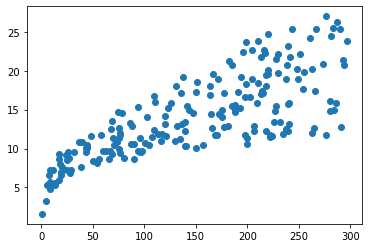

In [67]:
x = data['TV'].to_numpy()
Y = data['sales'].to_numpy()
plt.scatter(x,Y)

As we can see by the graph, it looks like as TV advertising increases, sales increase as well and that relation seems pretty strong AND non-linear. Therefore, we will try and fit a parabolic model. 
$$
f(x) = ax^2+bx+c
$$


We can also write this in matrix form as:

$$
\begin{align}
f(X) &= Xw \\ 
&= \begin{bmatrix}
| & | & | \\
1 & x & x^2 \\ 
|&|&|
\end{bmatrix}\begin{bmatrix}c\\b\\a\end{bmatrix}
\end{align}
$$

Many of you all might be wondering "Is this data really parabolic? I think it might be a different shape" and you would be right: there is a better shape and we will get into it later. 

Now the point of a regression model is to identify the optimal values of $w$. We could use an equation to determine the values, but for illustrative purposes, we will use **gradient descent**. 


Gradient descent is one of the most commonly used optimization algorithms for machine learning methods. It, and variations of it, are used for all sorts of models including even neural networks. The basic governing equation is: 

$$
w_{new} = w_{current} - \alpha_w  \nabla J_w(X,Y)
$$

Basically, we update the weights of our model by the negative gradient of our loss function with respect to the weights - AKA $\nabla J_w(X,Y)$ - times some learning rate $\alpha$. 


But what is the gradient of our loss function? Well most of the time we are using the squared loss function  

$$J_w(X,Y) = ||Y - Xw||^2$$

The gradient of this function (AKA the rate of change of the loss with a given $w$) is 

$$
\nabla J_w(X,Y) = -2X^T(Y-Xw)
$$


Where $X$ is the matrix that represents our variables and $Y$ is the vector of true values


So what's $\alpha$? Well, theres 2 possibilities. The first one is that we set $\alpha$ to some constant value thats small (relative to our data and loss). But we have to be careful with this approach. If we set $\alpha$ to be too small, then it will take forever to train our model. If we set $\alpha$ to large however, we could jump past the optimal solution repeatedly and never actually find the optimal: 


So what do we do? Well, theres an equation we can use to calculate the alpha:

$$
\begin{align}
d &= \nabla J_w(X,Y) \\
\alpha &= \frac{d^Td}{(X^TXd)^Td}
\end{align}
$$

Basically, our $\alpha$ will change depending on our loss and current weights. The larger the loss, the larger the $\alpha$. As we get closer to the optimal solution, $\alpha$ will decrease so we can better hone in on our optimal solution. We will then repeat this for multiple iterations. Our end algorithm ends up being:

> $\text{Initialize } w = \vec{0}$
> 
>
> $\text{Loop } i \text{ times}:$
>
> $\quad \text{Calculate} \nabla J_w(X,Y)$
>
>$\quad \text{Calculate } \alpha$
>
>$\quad w = w - \alpha \nabla J_w(X,Y)$
>
>$\text{end Loop}$

So getting into the actual implementation, first we will create a function to visualize the end prediction and our loss

In [68]:
def make_plots(x,Y, prediction, cost):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(16, 8, forward=True)
  fig.suptitle('Regression Outcomes')
  ax1.scatter(x,Y, label = 'Truth')
  ax1.scatter(x,prediction, label = 'Prediction')
  ax1.set_xlabel("TV Ad spending ($1000)")
  ax1.set_ylabel("Units Sold (1000s)")
  ax1.set_title("TV Advertising Impact on Sales")
  ax1.legend()
  ax2.semilogx(cost, 'o')
  ax2.set_xlabel("Log(Iterations)")
  ax2.set_ylabel("Squared Error")
  ax2.set_title("Relation between Cost and Iterations")

Now lets create a function to create and train our model:

In [69]:
def regression_model(x,Y, iterations, X = np.column_stack((np.ones(len(x)), x, x**2))):
  #create X
  N = len(x)
  #X = np.column_stack((np.ones(N), x, x**2))
  XtX = np.dot(np.transpose(X), X)
  ## Initialize w
  w = np.zeros(X.shape[1])
  ## Initialize vectors to track performance
  cost = np.zeros(iterations)
  alphas = np.zeros(iterations)
  ## Begin Gradient Descent#####
  for i in range(iterations):
    ## Calculate Gradient of the loss
    dJ = np.dot(np.transpose(X), np.dot(X, w)- Y)
    ## Calculate alpha
    alpha = np.dot(dJ, dJ) / np.dot(np.dot(XtX, dJ), dJ)
    ## Update weights 
    w = w - alpha*dJ
    ## record cost
    cost[i] = np.linalg.norm(np.dot(X, w)-Y)**2
  ## End Gradient Descent#####
  ## Print weights
  print('Weights: ', w)
  print("Final Cost: ", np.linalg.norm(np.dot(X, w)-Y)**2)
  ## Visualize results
  prediction = np.dot(X,w)
  make_plots(x,Y, prediction, cost)
  return prediction

Now lets run actually train our models. What we are going to do is observe the prediction outcomes and loss curves for 3 different numbers of gradient descent iterations: 1000, 10000, and 100000. 

As we get to higher iteration numbers, our model should get closer to the "best" predictor.  

Weights:  [ 0.249224    0.14747595 -0.00029813]
Final Cost:  2892.971817171741


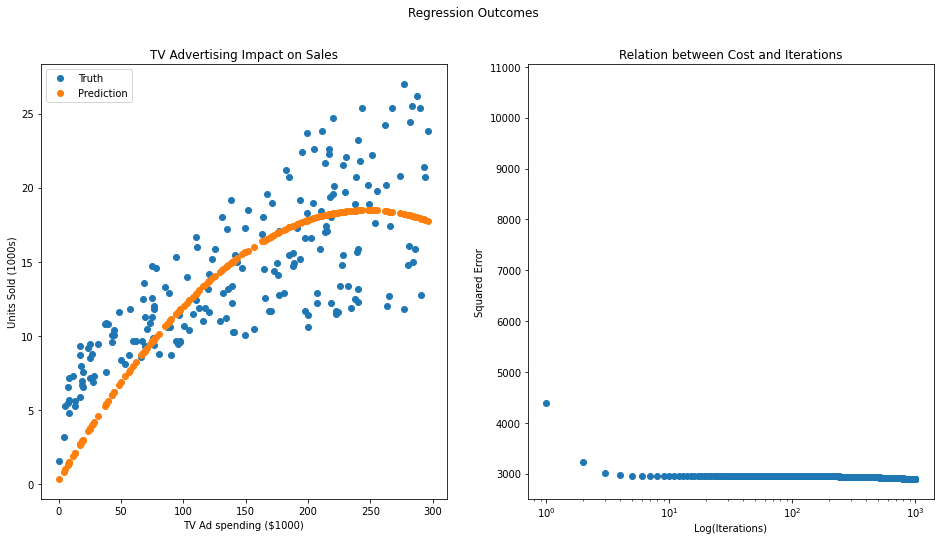

In [70]:
prediction1k = regression_model(x,Y,1000)

Weights:  [ 2.07242556e+00  1.22541315e-01 -2.26738159e-04]
Final Cost:  2457.5420821172047


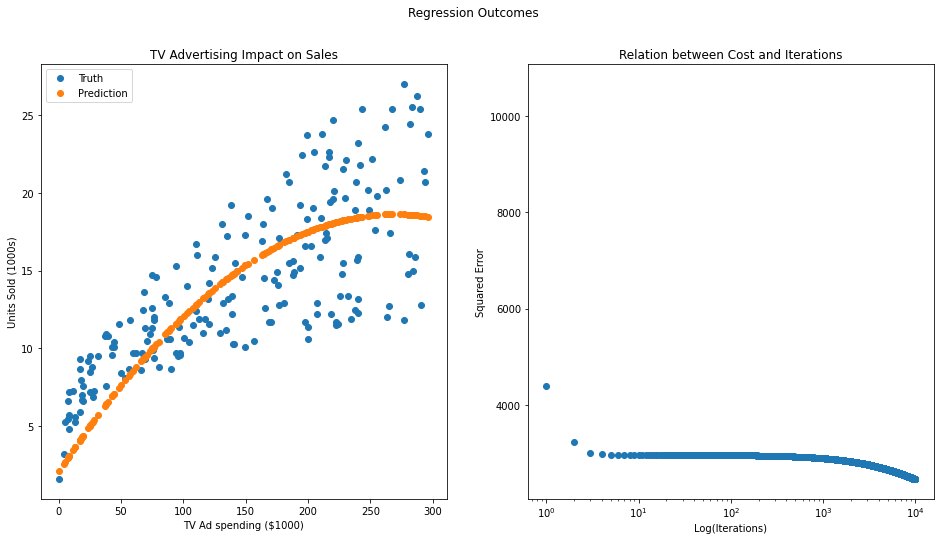

In [71]:
prediction10k = regression_model(x,Y,10000)

Weights:  [ 6.01647218e+00  6.86013887e-02 -7.22931352e-05]
Final Cost:  2063.962477716969


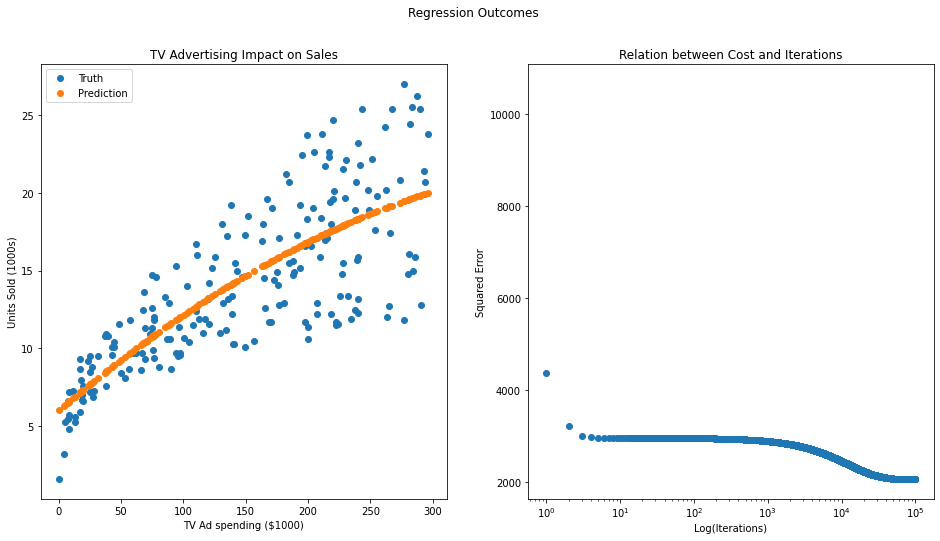

In [72]:
prediction100k = regression_model(x,Y,100000)

In all of these, as we increased the number of iterations, the error of our predictions got smaller and smaller. As we can see in the last graph, The error dropped dramatically in the first 10 iterations, plateaud for a bit, and then started dropping again between the 10000th and the 100000th iteration. 

We can also visualize the differences in predictions to get a better idea of this. 

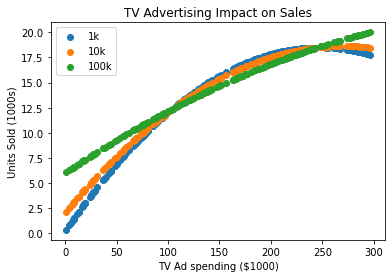

In [73]:

plt.scatter(x,prediction1k, label = '1k')
plt.scatter(x,prediction10k, label = '10k')
plt.scatter(x,prediction100k, label = '100k')
plt.legend()
plt.xlabel("TV Ad spending ($1000)")
plt.ylabel("Units Sold (1000s)")
plt.title("TV Advertising Impact on Sales")
plt.show()

Notice how the curve from 100k iterations of gradient descent is very different from the other two curves. Additionally, notice how the 10k curve is "flatter" than the 1k curve almost like its transforming into the 100k curve. Thats because it is!

**The more iterations of gradient descent our model undergoes, the closer it will get to the optimal model weights.**

Now there is a caveat though, *gradient descent can only get the best performance given the data and model it is optimizing. If the data is bad or the model is bad, gradient descent will perform poorly.* And in this case, the model is bad. There is a better model to fit this data: 

$$
\begin{align}
f(x) &= a\log x + bx + c\\
f(X) &= Xw \\ 
&= \begin{bmatrix}
| & | & | \\
1 & x & \log x \\ 
|&|&|
\end{bmatrix}\begin{bmatrix}c\\b\\a\end{bmatrix}
\end{align}
$$

With the right model, we can get a **better** error in **less** iterations. 



Weights:  [2.49111567 0.03258641 1.44177411]
Final Cost:  2019.093995166741


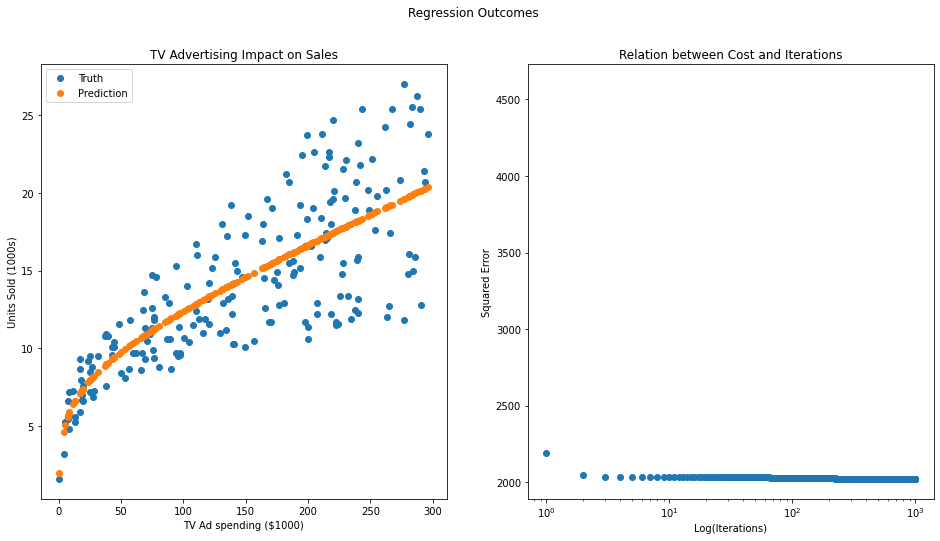

In [74]:
logprediction100k = regression_model(x,Y,1000, X = np.column_stack((np.ones(len(x)), x, np.log(x))))

As we can see, the final cost of the right model (2019) is lower than our best performing incorrect model (2063) and it only took 1000 iterations to get there versus 100000 iterations. 